In [1]:
exec(open("functions.py").read())

In [114]:
%matplotlib notebook

In [3]:
M_star = 1.4*msun #[m]   #Mass neutron star
Rs = 2*M_star #[m]
R_star = 12000 #[m]

d = 600*Rs
alpha_0 = 20*30**0.5 #[m]
beta_0 = 20*30**0.5 #[m]
zeta_0 = 0/degrees
y_initial = initial(d,alpha_0,beta_0,zeta_0)

M = M_star
a = 1e-6
b = imp_par(d,alpha_0,beta_0,zeta_0,M,a)

In [4]:
Metric(y_initial[1],y_initial[2],M,a)

[[[-0.9983333333365816], [0], [0], [-6.496515158671655e-18]],
 [[0], [1.0016694490785438], [0], [0]],
 [[0], [0], [6157147473599.998], [0]],
 [[-6.496515158671655e-18], [0], [0], [24000.001184626468]]]

In [5]:
Gamma_r_tt(y_initial[1],y_initial[2],M,a)

3.352776063144033e-10

In [6]:
xi(y_initial)

xi = -0.9999999999935032 almost true


In [7]:
yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='RK45',dense_output=True,events=star)

In [8]:
t_end=yarr.t_events
time_vec=np.linspace(0, t_end[0][0],10000)
#time_vec=np.linspace(0, 1.001*d,10000)

In [9]:
yarr_new=yarr.sol(time_vec)

#Spherical Coordinates to Cartesian Coordinates

Rad=yarr_new[1,:]
Theta=yarr_new[2,:]
Phi=yarr_new[3,:]

X=Rad*sin(Theta)*cos(Phi)
Y=Rad*sin(Theta)*sin(Phi)
Z=Rad*cos(Theta)

cart=(X,Y,Z)

In [10]:
#check=xi_check(yarr_new)

In [11]:
#for i in range(len(yarr_new[1])):
#        print (yarr_new[1,i])

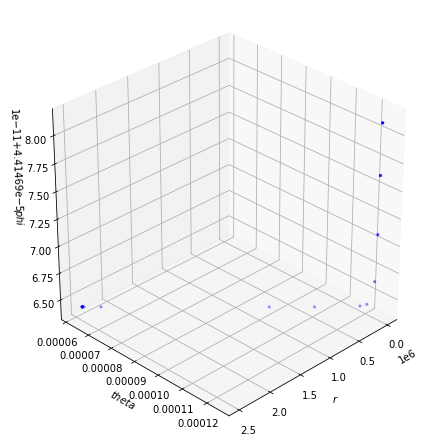

In [12]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(yarr.y[1,:], yarr.y[2,:], yarr.y[3,:], c='b', marker='.')
ax.set_xlabel('$r$')
ax.set_ylabel('$theta$')
ax.set_zlabel('$phi$')
ax.view_init(30, 45)

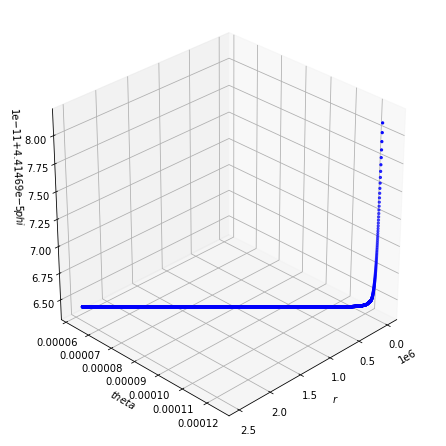

In [13]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(yarr_new[1,:], yarr_new[2,:], yarr_new[3,:], c='b', marker='.')
ax.set_xlabel('$r$')
ax.set_ylabel('$theta$')
ax.set_zlabel('$phi$')
ax.view_init(30, 45)

In [14]:
#plt.plot(time_vec,X)

In [15]:
#plt.plot(time_vec,Y)

In [16]:
#plt.plot(time_vec,Z)

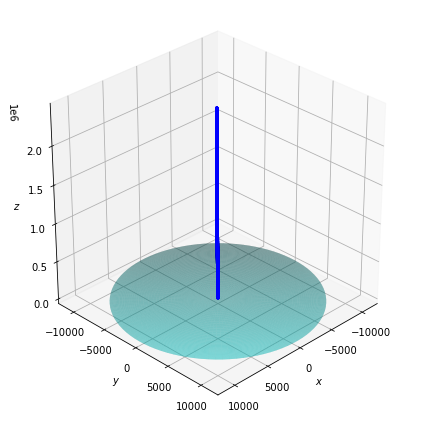

In [17]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(X,Y,Z, c='b', marker='.')
ax.set_xlim([-R_star,R_star])
ax.set_ylim([-R_star,R_star])
ax.set_zlim([-R_star,Z[0]])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(30, 45)
plt.tight_layout()
#plt.show()

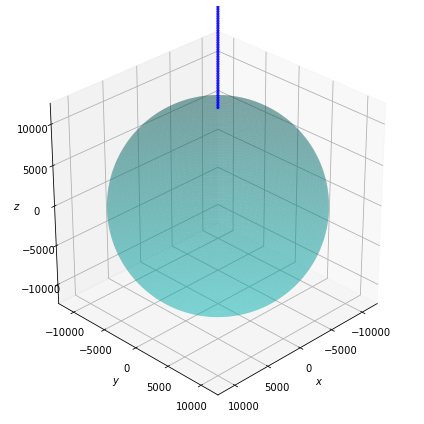

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(X,Y,Z, c='b', marker='.')
ax.set_xlim([-R_star,R_star])
ax.set_ylim([-R_star,R_star])
ax.set_zlim([-R_star,R_star])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(30, 45)
plt.tight_layout()
#plt.show()

In [80]:
M_star = 1.4*msun #[m]   #Mass neutron star
Rs = 2*M_star #[m]
R_star = 12000 #[m]

d = 600*Rs
alpha_0 = R_star #[m]
beta_0 = 0 #[m]
zeta_0 = 0.1/degrees
y_initial = initial(d,alpha_0,beta_0,zeta_0)

M = M_star
a = 1e-10
b = imp_par(d,alpha_0,beta_0,zeta_0,M,a)

In [65]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='RK23',dense_output=True,events=star)

In [66]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='DOP853',dense_output=True,events=star)

In [67]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='Radau',dense_output=True,events=star)

In [68]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='BDF',dense_output=True,events=star)

In [69]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='LSODA',dense_output=True,events=star)

In [104]:
yarr=solve_ivp(trajectory,[0,2*d],y_initial,args=(M,a,b),method='RK45',atol=1e-10,rtol=1e-10,dense_output=True,events=star)

In [105]:
t_end=yarr.t_events
time_vec=np.linspace(0, t_end[0][0],10000)
#time_vec=np.linspace(0, 2*d,10000)

In [106]:
yarr_new=yarr.sol(time_vec)

#Spherical Coordinates to Cartesian Coordinates

Rad=yarr_new[1,:]
Theta=yarr_new[2,:]
Phi=yarr_new[3,:]

X=Rad*sin(Theta)*cos(Phi)
Y=Rad*sin(Theta)*sin(Phi)
Z=Rad*cos(Theta)

cart=(X,Y,Z)

In [107]:
#check=xi_check(yarr_new)

In [108]:
xi(yarr_new[:,len(yarr_new[0])-1]) #testing xi at the last part of trajectory

xi = -1.442298736752541 false


In [109]:
xi(yarr_new[:,len(yarr_new[0])-1]) #testing xi at the last part of trajectory

xi = -1.442298736752541 false


<IPython.core.display.Javascript object>


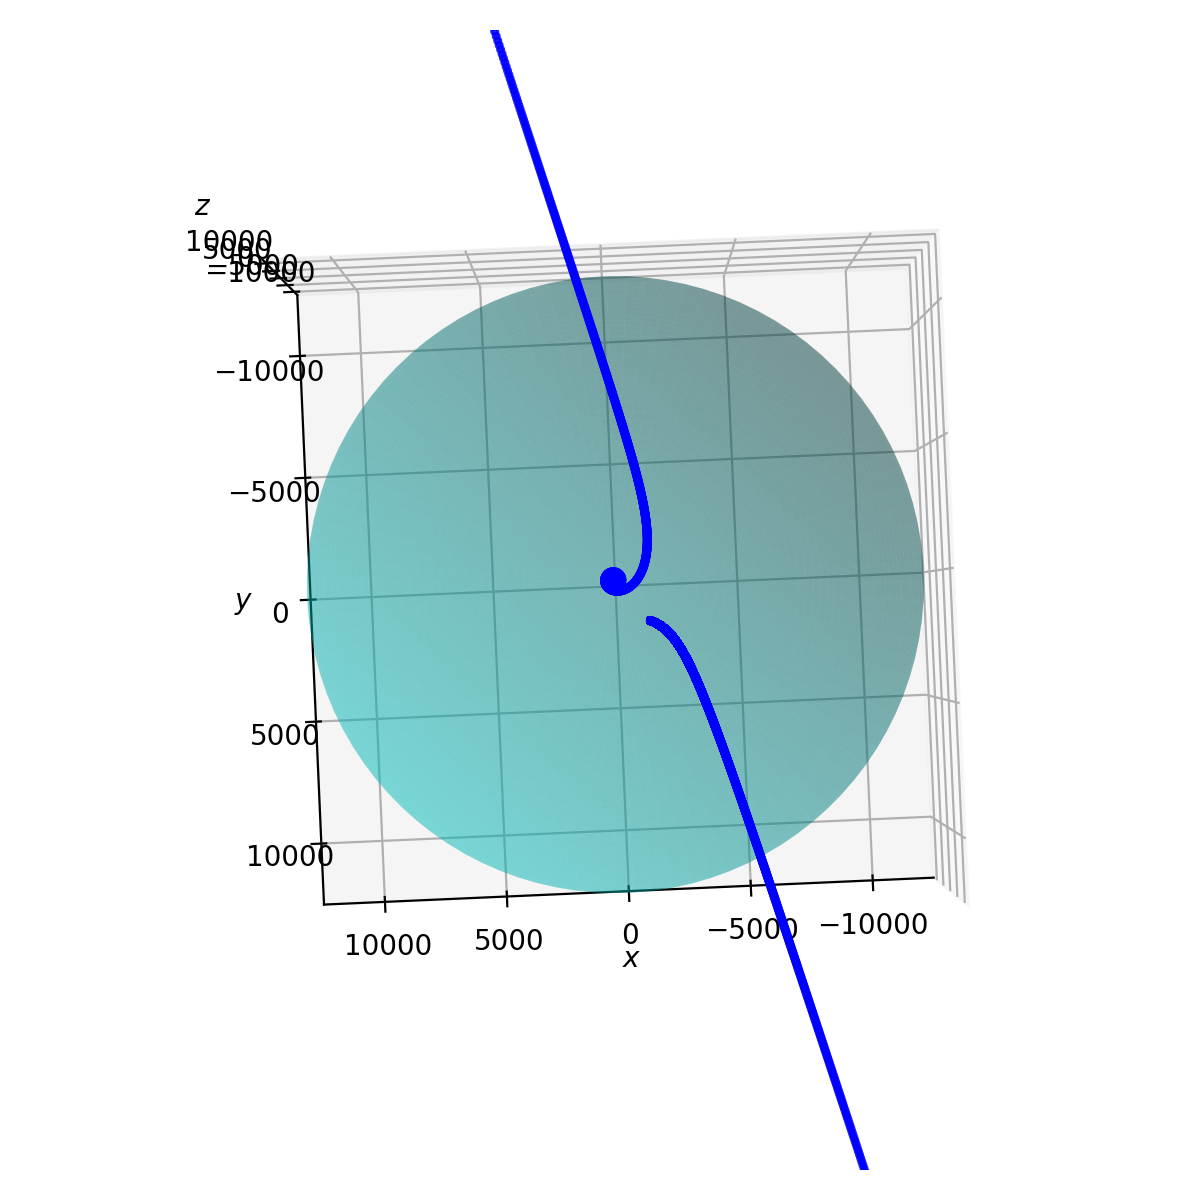

In [117]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(X,Y,Z, c='b', marker='.')
ax.set_xlim([-R_star,R_star])
ax.set_ylim([-R_star,R_star])
ax.set_zlim([-R_star,R_star])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(-90, 0)
plt.tight_layout()
#plt.show()

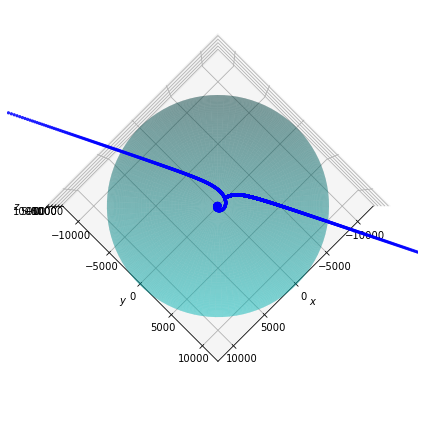

In [113]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(X,Y,Z, c='b', marker='.')
ax.set_xlim([-R_star,R_star])
ax.set_ylim([-R_star,R_star])
ax.set_zlim([-R_star,R_star])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(90, 45)
plt.tight_layout()
#plt.show()